How many new COVID-19 cases and deaths occur each day in Los Angeles County, and have these numbers changed much over time?

In [1]:
pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


Average Daily Percentage Change in Cases (Los Angeles County): nan%


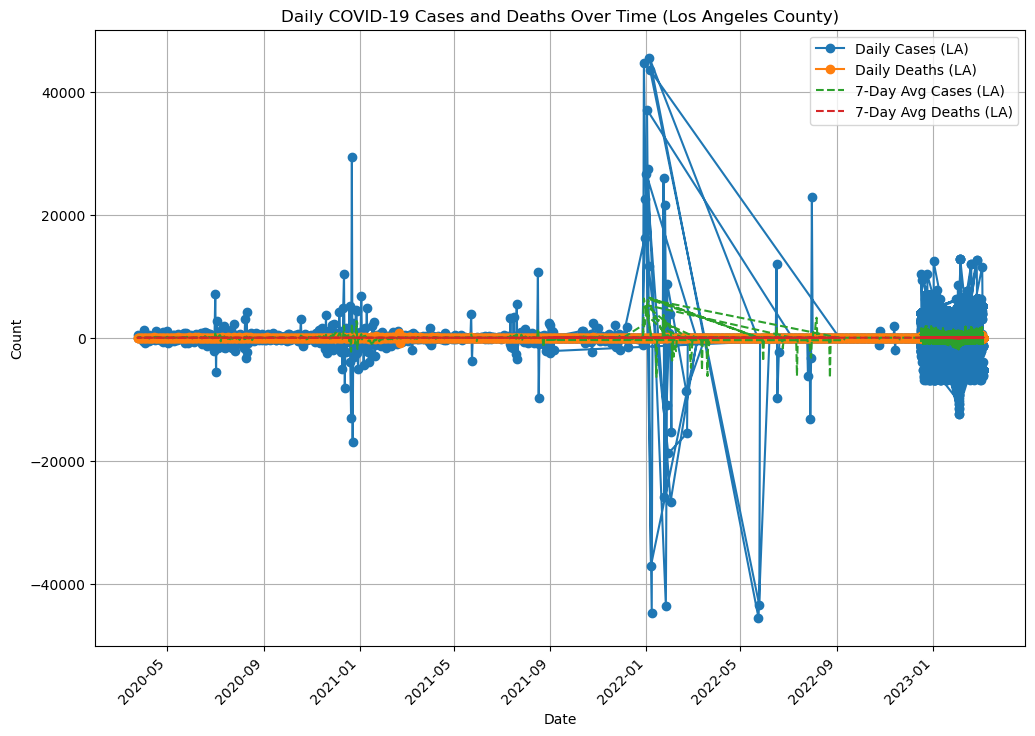

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Construct the full file path
desktop_path = r'C:\Users\celes\Desktop'
file_name = 'LA_County_COVID_Cases_20231018.csv'
full_file_path = os.path.join(desktop_path, file_name)

# Load your COVID-19 data into a Pandas DataFrame
data = pd.read_csv(full_file_path)

# Convert the 'Date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Calculate daily changes for cases and deaths in Los Angeles County
data['DailyCases_LA'] = data['new_cases'].diff()
data['DailyDeaths_LA'] = data['new_deaths'].diff()

# Calculate the average daily percentage change over the past six months
six_months_ago = pd.to_datetime('today') - pd.DateOffset(months=6)
average_daily_percentage_change_LA = data[data['date'] >= six_months_ago]['DailyCases_LA'].pct_change().mean() * 100

# Print the results
print(f"Average Daily Percentage Change in Cases (Los Angeles County): {average_daily_percentage_change_LA:.2f}%")

# Visualize the data
plt.figure(figsize=(12, 8))

plt.plot(data['date'], data['DailyCases_LA'], label='Daily Cases (LA)', linestyle='-', marker='o')
plt.plot(data['date'], data['DailyDeaths_LA'], label='Daily Deaths (LA)', linestyle='-', marker='o')

# Plot rolling averages for better trend visualization
rolling_window = 7  # 7-day rolling average
plt.plot(data['date'], data['DailyCases_LA'].rolling(window=rolling_window).mean(), label=f'{rolling_window}-Day Avg Cases (LA)', linestyle='--')
plt.plot(data['date'], data['DailyDeaths_LA'].rolling(window=rolling_window).mean(), label=f'{rolling_window}-Day Avg Deaths (LA)', linestyle='--')

plt.title('Daily COVID-19 Cases and Deaths Over Time (Los Angeles County)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.show()


#The provided code generates a plot that visualizes the daily COVID-19 cases and deaths in Los Angeles County over time, along with their 7-day rolling averages.